In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
# Load the dataset from a CSV file provided by the user
file_path = input("Enter the path to the CSV file: ")
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


Enter the path to the CSV file: /content/winequality-red.csv
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0  

In [ ]:
# Check for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:

# Display summary statistics
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

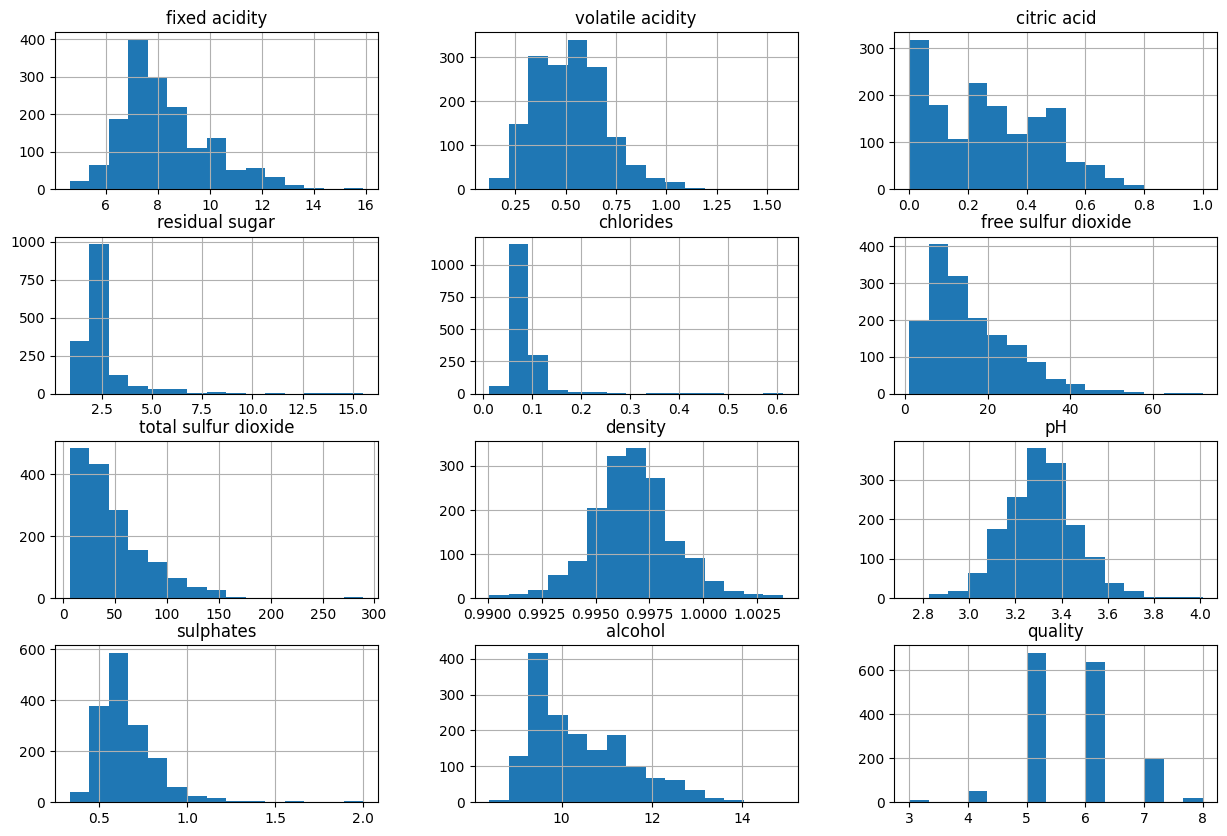

In [ ]:

# Plot histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.show()



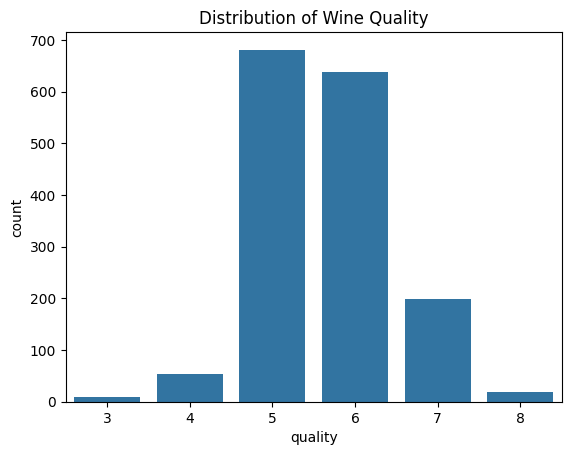

In [ ]:
# Check the distribution of the target variable (quality)
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()


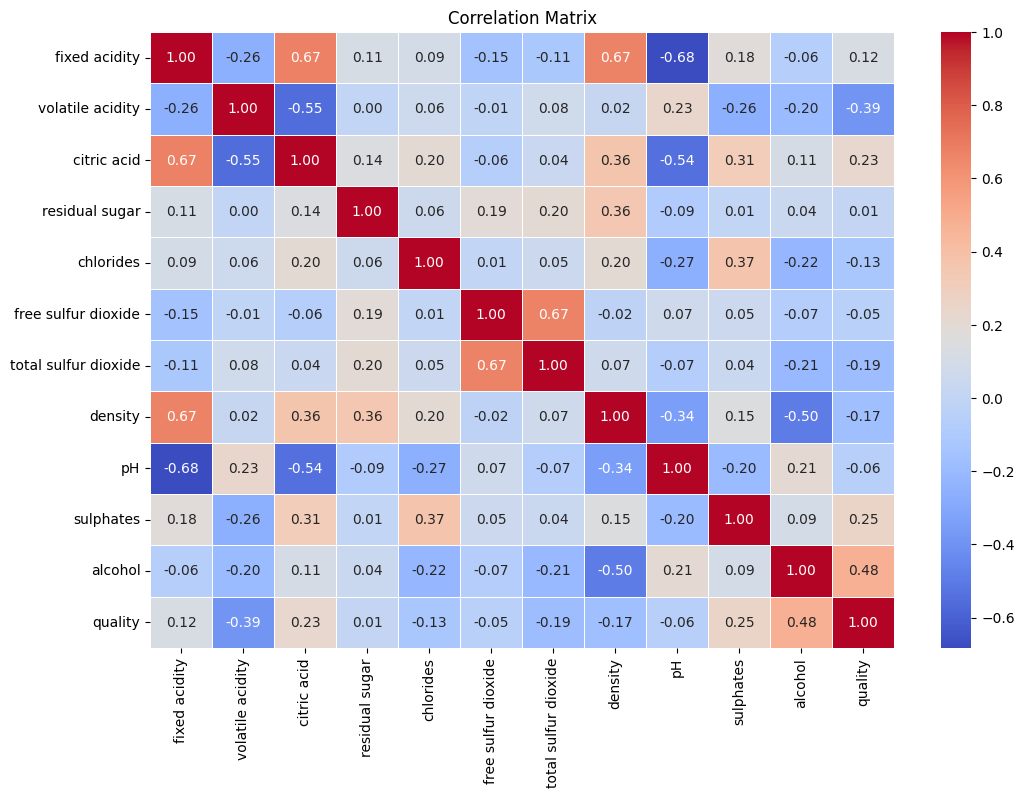

In [ ]:

# Display the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Split the data into features and target variable
X = df.drop(columns='quality')
y = df['quality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


XGBoost Accuracy: 0.696875
Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   1 104  24   1   0]
 [  0   1  25  96   9   1]
 [  0   0   1  17  23   1]
 [  0   0   0   2   3   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.75      0.80      0.78       130
           6       0.68      0.73      0.70       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.70       320
   macro avg       0.34      0.35      0.34       320
weighted avg       0.67      0.70      0.68       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


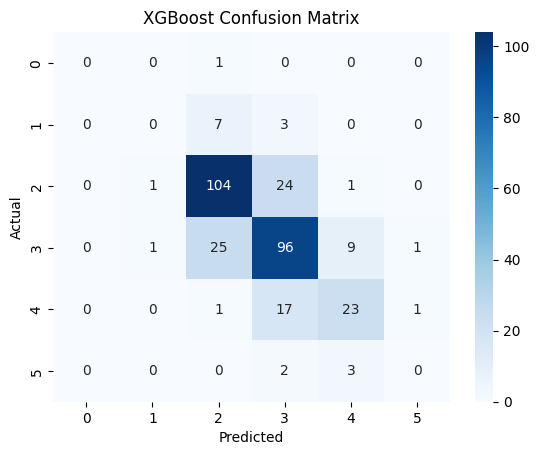

In [ ]:
# Normalize the labels so that they start from 0
y_train_normalized = y_train - y_train.min()
y_test_normalized = y_test - y_train.min()

# Now, fit the XGBoost model with the normalized labels
xgb_model.fit(X_train, y_train_normalized)

# Predict the outcomes on the test set
xgb_predictions_normalized = xgb_model.predict(X_test)

# Revert the predictions to the original scale
xgb_predictions = xgb_predictions_normalized + y_train.min()

# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

# Confusion Matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
print("Confusion Matrix:")
print(xgb_conf_matrix)

# Classification Report
xgb_class_report = classification_report(y_test, xgb_predictions)
print("Classification Report:")
print(xgb_class_report)

# Plot the confusion matrix
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
